In [443]:
import numpy as np
import tensorflow as tf
import pandas as pd
import glob
import random

from sklearn import model_selection
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
def features_from_bottles(bottles):
    X = []
    y = []
    for bottle in bottles:
        label = bottle.split("/")[-1].replace("_inception_v3.txt", "")
        line = open(bottle).readlines()
        X.append( np.loadtxt(line[0].split(','), dtype=np.float32) )
        y.append(label)
        
    X = np.array(X)
    return (X, y)
        

In [57]:
bottles = glob.glob('./features/train_img_vectors/*.txt')
X, y = features_from_bottles(bottles)

In [58]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4)

In [87]:
train_labels = pd.read_csv('./DL3 Dataset/meta-data/train.csv')
test_labels = pd.read_csv('./DL3 Dataset/meta-data/test.csv')
train_labels = train_labels.set_index('Image_name');

In [88]:
train_labels.head(3)

,attrib_01,attrib_02,attrib_03,attrib_04,attrib_05,attrib_06,attrib_07,attrib_08,attrib_09,attrib_10,...,attrib_76,attrib_77,attrib_78,attrib_79,attrib_80,attrib_81,attrib_82,attrib_83,attrib_84,attrib_85
Image_name,,,,,,,,,,,,,,,,,,,,,
Image-1.jpg,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
Image-2.jpg,1,0,0,1,0,0,1,1,0,0,...,1,1,1,1,0,0,0,1,0,1
Image-3.jpg,1,0,0,1,0,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1


In [94]:
len(train_labels.loc['Image-22.jpg'].tolist())

85

In [101]:
y_train_ = np.array([train_labels.loc[label] for label in y_train])
y_test_ = np.array([train_labels.loc[label] for label in y_test])

In [124]:
model = Sequential()
model.add(Dense(2048, activation='tanh', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(y_train_.shape[1], activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam')

model.fit(X_train, y_train_, epochs=15, batch_size=2000)

Epoch 1/15
7560/7560 [==============================] - 3s 447us/step - loss: 0.6221
Epoch 2/15
7560/7560 [==============================] - 3s 380us/step - loss: 0.4611
Epoch 3/15
7560/7560 [==============================] - 3s 382us/step - loss: 0.3340
Epoch 4/15
7560/7560 [==============================] - 3s 408us/step - loss: 0.2594
Epoch 5/15
7560/7560 [==============================] - 3s 407us/step - loss: 0.2170
Epoch 6/15
7560/7560 [==============================] - 3s 397us/step - loss: 0.1877
Epoch 7/15
7560/7560 [==============================] - 3s 399us/step - loss: 0.1646
Epoch 8/15
7560/7560 [==============================] - 3s 402us/step - loss: 0.1466
Epoch 9/15
7560/7560 [==============================] - 3s 399us/step - loss: 0.1333
Epoch 10/15
7560/7560 [==============================] - 3s 407us/step - loss: 0.1215
Epoch 11/15
7560/7560 [==============================] - 3s 423us/step - loss: 0.1127
Epoch 12/15
7560/7560 [==============================] - 3s 407

In [125]:
preds = model.predict(X_test)
preds[preds>=0.5] = 1
preds[preds<0.5] = 0

result = preds.reshape(-1) == y_test_.reshape(-1)
acc_on_test = sum(result)/len(result)
print("Accuracy", acc_on_test)

Accuracy 0.976360877684407


0.9712581699346405

In [126]:
round(0.976360877684407, 3)

0.976

### Test images from Hacker Earth

In [127]:
bottles = glob.glob('./features/test_img_vectors/*.txt')
X, y = features_from_bottles(bottles)

In [129]:
preds = model.predict(X)
preds[preds>=0.5] = 1
preds[preds<0.5] = 0

In [133]:
preds.shape

(5400, 85)

In [147]:
attribs = ['attrib_'+"{:02}".format(i) for i in range(1, 86)]

In [176]:
data = {}
for i in range(len(preds)):
    row = {a: int(b)  for (a,b) in zip(attribs, preds[i])}
    data[y[i]] = row

In [178]:
result = []
for val in test_labels['Image_name'].tolist():
    point_ = data[val]
    point_['Image_name'] = val
    result.append(point_)
    

In [181]:
df_preds = pd.DataFrame(result)
df_preds = df_preds.set_index('Image_name')

In [182]:
df_preds.head()

,attrib_01,attrib_02,attrib_03,attrib_04,attrib_05,attrib_06,attrib_07,attrib_08,attrib_09,attrib_10,...,attrib_76,attrib_77,attrib_78,attrib_79,attrib_80,attrib_81,attrib_82,attrib_83,attrib_84,attrib_85
Image_name,,,,,,,,,,,,,,,,,,,,,
Image-1.jpg,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,1
Image-2.jpg,0,1,0,1,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,1
Image-3.jpg,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
Image-4.jpg,1,0,0,0,1,1,1,0,0,1,...,0,1,1,1,0,0,0,0,0,0
Image-5.jpg,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0


In [183]:
df_preds.to_csv('result.csv')

### Parameter tuning
Search set of parameters to try on training and find out the optimal best performer

#### Alphas

In [213]:
r = -4 * np.random.rand() # r belogns to [-4, 0]
a = np.log10(0.0001)
r_range = [(i, 10**i) for i in range(-4, 1)]
print("ranges: ", r_range)
print("r:", r)
print("a:", a)

ranges:  [(-4, 0.0001), (-3, 0.001), (-2, 0.01), (-1, 0.1), (0, 1)]
r: -3.030722570009128
a: -4.0


In [347]:
def random_from_a_b(a, b, size):
    nums = []
    for i in range(size):
        c = a + (b - a) * np.random.rand()
        nums.append(c)
    return nums

In [462]:
alpha_ranges = [(-4, -3), (-3, -2), (-2, -1), (-1, 0)]
alphas = [0.001, 0.0001, 0.01, 0.1, 0.0007, 0.007]
# for (a, b) in alpha_ranges:
#     rs = random_from_a_b(a, b, 10)
#     alphas += [10**i for i in rs]

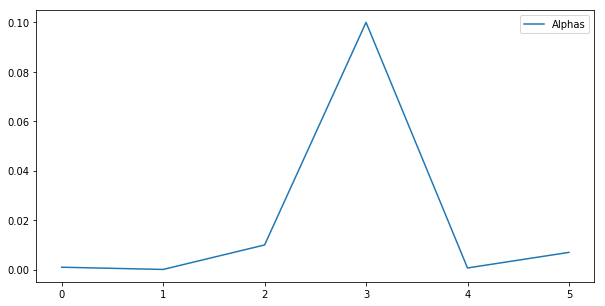

In [463]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(alphas)), alphas, label='Alphas')
plt.legend()

#### Layers and Neurons

In [464]:
#alphas
layers = list(range(1, 11))
neurons_set = [ [np.random.randint(64, 8192, i) for i in layers] for x in range(10) ]
activations = ['elu', 'relu', 'selu', 'tanh', 'linear']


In [465]:
import itertools
layer_comb = list(itertools.product(*[layers, activations, alphas, list(range(10))]))

In [466]:
len(layer_comb)

3000

### Improvements base on first model

First model above has 0.976 accuracy in dev set and 0.96 in Lead Board Test

In [467]:
_layer_comb = layer_comb[:]
random.shuffle(_layer_comb)
_layer_comb[:10]

[(4, 'linear', 0.007, 6),
 (3, 'selu', 0.01, 3),
 (3, 'tanh', 0.0001, 9),
 (8, 'relu', 0.0001, 1),
 (2, 'linear', 0.001, 9),
 (2, 'selu', 0.0007, 5),
 (9, 'tanh', 0.0007, 6),
 (2, 'tanh', 0.0001, 4),
 (8, 'linear', 0.0001, 5),
 (5, 'linear', 0.01, 2)]

In [468]:
trains = []
for (num_layers, activation, lr, num_neuron_set) in _layer_comb:
    model = Sequential()
    for i_layer in range(num_layers):
        num_neurons = neurons_set[num_neuron_set][num_layers][i_layer]
        if i_layer == 0:
            model.add(Dense(num_neurons, activation=activation, input_dim=X_train.shape[1]))
        else:
            model.add(Dense(num_neurons, activation=activation))
        model.add(Dropout(0.5))
    # Last Layer
    model.add(Dense(y_train_.shape[1], activation='sigmoid'))
    # Optimization
    opt = Adam(lr=lr)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    model.fit(X_train, y_train_, epochs=15, batch_size=2000, verbose=0)
    # Prediction
    preds = model.predict(X_test)
    preds[preds>=0.5] = 1
    preds[preds<0.5] = 0
    result = preds.reshape(-1) == y_test_.reshape(-1)
    acc_on_test = sum(result)/len(result)
    # Losses
    test_loss = model.evaluate(X_test, y_test_, verbose=0)
    train_loss = model.evaluate(X_train, y_train_, verbose=0)

    point_model = {
        'num_layers':num_layers, 'activation':activation,
        'lr':lr, 'test_loss':test_loss, 'test_acc':acc_on_test,
        'train_loss':train_loss,
        'neurons': ','.join([str(s) for s in neurons_set[num_neuron_set][num_layers] ] )
    }
    trains.append(point_model)
    print("Layers:", num_layers, 'Activation',activation,
          "Accuracy:", acc_on_test, "Test loss:", test_loss)

Layers: 4 Activation linear Accuracy: 0.7448972922502334 Test loss: 4.0976821127392
Layers: 3 Activation selu Accuracy: 0.7448692810457517 Test loss: 4.093996698894198
Layers: 3 Activation tanh Accuracy: 0.9742133520074696 Test loss: 0.07179442030333337
Layers: 8 Activation relu Accuracy: 0.7802450980392157 Test loss: 0.47916274789779906
Layers: 2 Activation linear Accuracy: 0.9725186741363212 Test loss: 0.07662172673477066
Layers: 2 Activation selu Accuracy: 0.9749696545284781 Test loss: 0.07030150859601914
Layers: 9 Activation tanh Accuracy: 0.7487768440709617 Test loss: 0.5112257179759797
Layers: 2 Activation tanh Accuracy: 0.9722455648926237 Test loss: 0.08000467133427423
Layers: 8 Activation linear Accuracy: 0.9437675070028011 Test loss: 0.1470096079603074
Layers: 5 Activation linear Accuracy: 0.5191269841269841 Test loss: 7.699259932079013
Layers: 6 Activation relu Accuracy: 0.7486647992530345 Test loss: 4.037288060263982
Layers: 2 Activation selu Accuracy: 0.25147525676937443 Te

IndexError: list index out of range

In [461]:
trains_data = pd.DataFrame(trains)
trains_data.head()

,activation,lr,neurons,num_layers,test_acc,test_loss,train_loss
0,elu,0.001000,"5901,1672,1997,3857,4653,3202,5041",6,0.797911,0.427350,0.430979
1,relu,0.000644,"4135,7496,7024,3340",3,0.965091,0.090499,0.088249
2,relu,0.000182,"135,2984,5605",2,0.879622,0.311611,0.313760
3,elu,0.010275,"3315,6534,136",2,0.747386,4.056760,4.067514
4,elu,0.000919,"4334,1964,4652,2280,7724,4398",5,0.723903,4.425958,4.453276


(10, 7)

In [442]:
np.random.choice(a, size=3)

array([8, 7, 1])

[{'activation': 'linear',
  'lr': 0.007,
  'neurons': '3624,1949,708,5096,8092',
  'num_layers': 4,
  'test_acc': 0.7448972922502334,
  'test_loss': 4.0976821127392,
  'train_loss': 4.102423663870998},
 {'activation': 'selu',
  'lr': 0.01,
  'neurons': '7188,4488,1917,1217',
  'num_layers': 3,
  'test_acc': 0.7448692810457517,
  'test_loss': 4.093996698894198,
  'train_loss': 4.097890119703989},
 {'activation': 'tanh',
  'lr': 0.0001,
  'neurons': '8030,5464,6856,6483',
  'num_layers': 3,
  'test_acc': 0.9742133520074696,
  'test_loss': 0.07179442030333337,
  'train_loss': 0.06371188142864162},
 {'activation': 'relu',
  'lr': 0.0001,
  'neurons': '4288,5193,5007,752,4157,2347,7212,4414,1032',
  'num_layers': 8,
  'test_acc': 0.7802450980392157,
  'test_loss': 0.47916274789779906,
  'train_loss': 0.48021044330622153},
 {'activation': 'linear',
  'lr': 0.001,
  'neurons': '984,2969,4307',
  'num_layers': 2,
  'test_acc': 0.9725186741363212,
  'test_loss': 0.07662172673477066,
  'train_lo

In [412]:
model = Sequential()
model.add(Dense(2048, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_.shape[1], activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train_, epochs=15, batch_size=2000)

preds = model.predict(X_test)
preds[preds>=0.5] = 1
preds[preds<0.5] = 0

result = preds.reshape(-1) == y_test_.reshape(-1)
acc_on_test = sum(result)/len(result)
print("Accuracy", acc_on_test)

Epoch 1/15
7560/7560 [==============================] - 4s 541us/step - loss: 0.5932
Epoch 2/15
7560/7560 [==============================] - 3s 406us/step - loss: 0.4464
Epoch 3/15
7560/7560 [==============================] - 3s 417us/step - loss: 0.3414
Epoch 4/15
7560/7560 [==============================] - 3s 457us/step - loss: 0.2679
Epoch 5/15
7560/7560 [==============================] - 3s 416us/step - loss: 0.2173
Epoch 6/15
7560/7560 [==============================] - 3s 412us/step - loss: 0.1803
Epoch 7/15
7560/7560 [==============================] - 3s 421us/step - loss: 0.1536
Epoch 8/15
7560/7560 [==============================] - 3s 415us/step - loss: 0.1320
Epoch 9/15
7560/7560 [==============================] - 3s 424us/step - loss: 0.1159
Epoch 10/15
7560/7560 [==============================] - 3s 416us/step - loss: 0.1030
Epoch 11/15
7560/7560 [==============================] - 3s 418us/step - loss: 0.0927
Epoch 12/15
7560/7560 [==============================] - 3s 416

In [187]:
test_loss = model.evaluate(X_test, y_test_)

5040/5040 [==============================] - 1s 252us/step


In [511]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=84, weights='uniform')
clf.fit(X_train, y_train_)
clf.score(X_test, y_test_)

0.814484126984127